# 1. 라이브러리 및 데이터 가져오기

In [2]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
#import seaborn as sns

garlic = pd.read_csv('C:/sa/week/garlic_week.csv')

garlic.head()

,week,retail price,avgTemp,minTemp,maxTemp,rainfall,exchange rate,export volume,export value,import volume,import value,production,cultivation area,market price
0,01월 1주 (2014.01.02 ~ 2014.01.08),"6,639",1.657143,-3.242857,7.628571,0.442857,1061.77,NaN,NaN,594925,423029715,7370020.833,522.125,82.358
1,01월 2주 (2014.01.09 ~ 2014.01.15),"6,868",-2.700000,-7.728571,2.900000,0.000000,1061.80,NaN,NaN,"594,925","423,029,715","7,370,021",522.000,82.358
2,01월 3주 (2014.01.16 ~ 2014.01.22),"6,282",-1.128571,-5.742857,4.057143,0.414286,1080.35,NaN,NaN,"594,925","423,029,715","7,370,021",522.000,82.358
3,01월 4주 (2014.01.23 ~ 2014.01.29),"6,192",-1.000000,-4.314286,9.100000,0.414286,1081.31,NaN,NaN,"594,925","423,029,715","7,370,021",522.000,82.358
4,02월 1주 (2014.02.03 ~ 2014.02.05),"6,477",2.671429,-2.285714,8.085714,1.071429,1075.00,NaN,NaN,594925,423029715,7370020.833,522.125,83.296


# 2. 데이터 전처리

### A. 쉼표제거 및 형식 변환

In [3]:
for column in garlic.columns:
    if garlic[column].dtype == 'object':
        garlic[column] = garlic[column].str.replace(',','')


for column in garlic.columns:
    if column != 'week':
        garlic[column] = pd.to_numeric(garlic[column])

#garlic = garlic.replace(0,np.nan)

garlic.head()

,week,retail price,avgTemp,minTemp,maxTemp,rainfall,exchange rate,export volume,export value,import volume,import value,production,cultivation area,market price
0,01월 1주 (2014.01.02 ~ 2014.01.08),6639,1.657143,-3.242857,7.628571,0.442857,1061.77,NaN,NaN,594925.0,423029715.0,7370020.833,522.125,82.358
1,01월 2주 (2014.01.09 ~ 2014.01.15),6868,-2.700000,-7.728571,2.900000,0.000000,1061.80,NaN,NaN,594925.0,423029715.0,7370021.000,522.000,82.358
2,01월 3주 (2014.01.16 ~ 2014.01.22),6282,-1.128571,-5.742857,4.057143,0.414286,1080.35,NaN,NaN,594925.0,423029715.0,7370021.000,522.000,82.358
3,01월 4주 (2014.01.23 ~ 2014.01.29),6192,-1.000000,-4.314286,9.100000,0.414286,1081.31,NaN,NaN,594925.0,423029715.0,7370021.000,522.000,82.358
4,02월 1주 (2014.02.03 ~ 2014.02.05),6477,2.671429,-2.285714,8.085714,1.071429,1075.00,NaN,NaN,594925.0,423029715.0,7370020.833,522.125,83.296


## B. 결측치 처리

In [4]:
nan_var = garlic.isna().sum()/len(garlic)
nan_var[nan_var>0.5]

Series([], dtype: float64)

In [5]:
garlic.isna().sum()

week                 0
retail price         0
avgTemp              0
minTemp              0
maxTemp              0
rainfall             0
exchange rate        0
export volume       89
export value        89
import volume        5
import value         5
production          35
cultivation area    35
market price         0
dtype: int64

In [6]:
# 평균값으로 대체 
from sklearn.impute import SimpleImputer

numeric_cols = garlic.select_dtypes(include=['number']).columns

imputer = SimpleImputer(strategy='mean')
garlic[numeric_cols] = imputer.fit_transform(garlic[numeric_cols])

garlic.isna().sum()

week                0
retail price        0
avgTemp             0
minTemp             0
maxTemp             0
rainfall            0
exchange rate       0
export volume       0
export value        0
import volume       0
import value        0
production          0
cultivation area    0
market price        0
dtype: int64

# 3. 모델링

### A. 피쳐선택

In [7]:
X= garlic[['exchange rate','avgTemp','maxTemp','minTemp','rainfall','import volume ','import value','production', 'export value', 'export volume ',
          'cultivation area', 'market price']]
y =garlic['retail price']

X_names = X.columns
X_names

Index(['exchange rate', 'avgTemp', 'maxTemp', 'minTemp', 'rainfall',
       'import volume ', 'import value', 'production', 'export value',
       'export volume ', 'cultivation area', 'market price'],
      dtype='object')

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  f_regression


sel_fr = SelectKBest(f_regression, k=3).fit(X, y)
print('\nf_regression: ') #F-value 회귀

print()
print('Selected features: ', [X_names[i] for i in sel_fr.get_support(indices=True)]) 


f_regression: 

Selected features:  ['exchange rate', 'production', 'market price']


In [9]:
# SFS(Sequential Feature Selector) : 순차적으로 특성을 선택하는 방법

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=4, direction='backward')

sfs.fit(X,y)

X_selected = sfs.transform(X)
X_selected_names = [X_names[i] for i in sfs.get_support(indices=True)]

print(f'{X_selected_names = }')

X_selected_names = ['exchange rate', 'minTemp', 'production', 'export volume ']


# 모델별 성능평가

### LSTM

In [10]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# 데이터 준비
X = garlic[['exchange rate', 'production', 'cultivation area']].values
y = garlic[['retail price']].values

# 데이터 정규화
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y)

# KFold 설정 (5개의 폴드 사용)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 1. 각 폴드별 MAE, MAPE, RMSE 저장 리스트
fold_mae_scores = []
fold_mape_scores = []
fold_rmse_scores = []
fold_histories = []  # 폴드별 학습 기록 저장 리스트
y_test_inverse_all = []  # 실제값 저장 리스트
y_pred_inverse_all = []  # 예측값 저장 리스트

# 2. K-fold 검증 루프
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # 모델 구성 및 학습
    lstm_model = Sequential()
    lstm_model.add(LSTM(32, activation='tanh', input_shape=(X_train.shape[1], 1)))
    lstm_model.add(Dropout(0.1))
    lstm_model.add(Dense(1))

    optimizer = Adam(learning_rate=0.01)
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=120, batch_size=10, verbose=2,
                        callbacks=[early_stopping])

    # 학습 기록 저장
    fold_histories.append(history.history)

    # 예측 및 역정규화
    y_val_pred = lstm_model.predict(X_val).flatten()
    y_val_pred_inverse = scalerY.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_val_inverse = scalerY.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # 성능 지표 계산 및 저장
    mae = mean_absolute_error(y_val_inverse, y_val_pred_inverse)
    mape = mean_absolute_percentage_error(y_val_inverse, y_val_pred_inverse)
    rmse = np.sqrt(mean_squared_error(y_val_inverse, y_val_pred_inverse))

    print(f'Fold {fold + 1} - MAE: {mae:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}')

    fold_mae_scores.append(mae)
    fold_mape_scores.append(mape)
    fold_rmse_scores.append(rmse)

    # 예측 및 실제값 저장
    y_test_inverse_all.append(y_val_inverse)
    y_pred_inverse_all.append(y_val_pred_inverse)

# 3. 평균 성능 출력
print(f'\nAverage MAE across all folds: {np.mean(fold_mae_scores):.4f}')
print(f'Average MAPE across all folds: {np.mean(fold_mape_scores):.4f}')
print(f'Average RMSE across all folds: {np.mean(fold_rmse_scores):.4f}')




Fold 1
Epoch 1/120


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 59ms/step - loss: 0.1033 - mae: 0.2589 - val_loss: 0.0521 - val_mae: 0.1751
Epoch 2/120
45/45 - 0s - 4ms/step - loss: 0.0564 - mae: 0.1881 - val_loss: 0.0515 - val_mae: 0.1988
Epoch 3/120
45/45 - 0s - 4ms/step - loss: 0.0484 - mae: 0.1858 - val_loss: 0.0469 - val_mae: 0.1952
Epoch 4/120
45/45 - 0s - 4ms/step - loss: 0.0406 - mae: 0.1734 - val_loss: 0.0412 - val_mae: 0.1887
Epoch 5/120
45/45 - 0s - 3ms/step - loss: 0.0412 - mae: 0.1734 - val_loss: 0.0425 - val_mae: 0.1810
Epoch 6/120
45/45 - 0s - 5ms/step - loss: 0.0329 - mae: 0.1527 - val_loss: 0.0402 - val_mae: 0.1739
Epoch 7/120
45/45 - 0s - 4ms/step - loss: 0.0343 - mae: 0.1557 - val_loss: 0.0526 - val_mae: 0.2002
Epoch 8/120
45/45 - 0s - 3ms/step - loss: 0.0337 - mae: 0.1530 - val_loss: 0.0421 - val_mae: 0.1676
Epoch 9/120
45/45 - 0s - 4ms/step - loss: 0.0291 - mae: 0.1424 - val_loss: 0.0287 - val_mae: 0.1459
Epoch 10/120
45/45 - 0s - 3ms/step - loss: 0.0264 - mae: 0.1346 - val_loss: 0.0292 - val_mae: 0.1500
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 59ms/step - loss: 0.0871 - mae: 0.2316 - val_loss: 0.0654 - val_mae: 0.2083
Epoch 2/120
45/45 - 0s - 4ms/step - loss: 0.0566 - mae: 0.1911 - val_loss: 0.0596 - val_mae: 0.2072
Epoch 3/120
45/45 - 0s - 4ms/step - loss: 0.0482 - mae: 0.1812 - val_loss: 0.0452 - val_mae: 0.1830
Epoch 4/120
45/45 - 0s - 4ms/step - loss: 0.0461 - mae: 0.1858 - val_loss: 0.0395 - val_mae: 0.1638
Epoch 5/120
45/45 - 0s - 4ms/step - loss: 0.0401 - mae: 0.1693 - val_loss: 0.0436 - val_mae: 0.1738
Epoch 6/120
45/45 - 0s - 4ms/step - loss: 0.0375 - mae: 0.1684 - val_loss: 0.0267 - val_mae: 0.1350
Epoch 7/120
45/45 - 0s - 5ms/step - loss: 0.0341 - mae: 0.1551 - val_loss: 0.0506 - val_mae: 0.1945
Epoch 8/120
45/45 - 0s - 4ms/step - loss: 0.0316 - mae: 0.1465 - val_loss: 0.0253 - val_mae: 0.1306
Epoch 9/120
45/45 - 0s - 4ms/step - loss: 0.0270 - mae: 0.1382 - val_loss: 0.0209 - val_mae: 0.1183
Epoch 10/120
45/45 - 0s - 4ms/step - loss: 0.0265 - mae: 0.1349 - val_loss: 0.0199 - val_mae: 0.1115
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 60ms/step - loss: 0.0822 - mae: 0.2301 - val_loss: 0.0524 - val_mae: 0.1910
Epoch 2/120
45/45 - 0s - 4ms/step - loss: 0.0593 - mae: 0.2018 - val_loss: 0.0460 - val_mae: 0.1790
Epoch 3/120
45/45 - 0s - 4ms/step - loss: 0.0471 - mae: 0.1824 - val_loss: 0.0395 - val_mae: 0.1799
Epoch 4/120
45/45 - 0s - 4ms/step - loss: 0.0377 - mae: 0.1681 - val_loss: 0.0281 - val_mae: 0.1457
Epoch 5/120
45/45 - 0s - 4ms/step - loss: 0.0331 - mae: 0.1503 - val_loss: 0.0267 - val_mae: 0.1296
Epoch 6/120
45/45 - 0s - 4ms/step - loss: 0.0315 - mae: 0.1491 - val_loss: 0.0257 - val_mae: 0.1384
Epoch 7/120
45/45 - 0s - 4ms/step - loss: 0.0302 - mae: 0.1435 - val_loss: 0.0318 - val_mae: 0.1505
Epoch 8/120
45/45 - 0s - 4ms/step - loss: 0.0277 - mae: 0.1368 - val_loss: 0.0217 - val_mae: 0.1213
Epoch 9/120
45/45 - 0s - 4ms/step - loss: 0.0263 - mae: 0.1313 - val_loss: 0.0258 - val_mae: 0.1376
Epoch 10/120
45/45 - 0s - 4ms/step - loss: 0.0244 - mae: 0.1277 - val_loss: 0.0247 - val_mae: 0.1341
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 57ms/step - loss: 0.0836 - mae: 0.2309 - val_loss: 0.0528 - val_mae: 0.1808
Epoch 2/120
45/45 - 0s - 4ms/step - loss: 0.0546 - mae: 0.1898 - val_loss: 0.0387 - val_mae: 0.1654
Epoch 3/120
45/45 - 0s - 4ms/step - loss: 0.0500 - mae: 0.1939 - val_loss: 0.0377 - val_mae: 0.1675
Epoch 4/120
45/45 - 0s - 4ms/step - loss: 0.0423 - mae: 0.1800 - val_loss: 0.0328 - val_mae: 0.1536
Epoch 5/120
45/45 - 0s - 4ms/step - loss: 0.0335 - mae: 0.1528 - val_loss: 0.0278 - val_mae: 0.1418
Epoch 6/120
45/45 - 0s - 4ms/step - loss: 0.0293 - mae: 0.1439 - val_loss: 0.0247 - val_mae: 0.1301
Epoch 7/120
45/45 - 0s - 4ms/step - loss: 0.0340 - mae: 0.1546 - val_loss: 0.0353 - val_mae: 0.1596
Epoch 8/120
45/45 - 0s - 4ms/step - loss: 0.0289 - mae: 0.1415 - val_loss: 0.0238 - val_mae: 0.1295
Epoch 9/120
45/45 - 0s - 4ms/step - loss: 0.0297 - mae: 0.1421 - val_loss: 0.0278 - val_mae: 0.1404
Epoch 10/120
45/45 - 0s - 4ms/step - loss: 0.0247 - mae: 0.1307 - val_loss: 0.0216 - val_mae: 0.1223
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 56ms/step - loss: 0.0822 - mae: 0.2314 - val_loss: 0.0663 - val_mae: 0.2057
Epoch 2/120
45/45 - 0s - 4ms/step - loss: 0.0527 - mae: 0.1827 - val_loss: 0.0548 - val_mae: 0.1881
Epoch 3/120
45/45 - 0s - 4ms/step - loss: 0.0482 - mae: 0.1870 - val_loss: 0.0455 - val_mae: 0.1918
Epoch 4/120
45/45 - 0s - 4ms/step - loss: 0.0434 - mae: 0.1784 - val_loss: 0.0392 - val_mae: 0.1802
Epoch 5/120
45/45 - 0s - 4ms/step - loss: 0.0391 - mae: 0.1716 - val_loss: 0.0328 - val_mae: 0.1621
Epoch 6/120
45/45 - 0s - 4ms/step - loss: 0.0337 - mae: 0.1568 - val_loss: 0.0312 - val_mae: 0.1396
Epoch 7/120
45/45 - 0s - 4ms/step - loss: 0.0316 - mae: 0.1488 - val_loss: 0.0304 - val_mae: 0.1428
Epoch 8/120
45/45 - 0s - 4ms/step - loss: 0.0278 - mae: 0.1381 - val_loss: 0.0284 - val_mae: 0.1392
Epoch 9/120
45/45 - 0s - 4ms/step - loss: 0.0290 - mae: 0.1404 - val_loss: 0.0251 - val_mae: 0.1337
Epoch 10/120
45/45 - 0s - 6ms/step - loss: 0.0289 - mae: 0.1432 - val_loss: 0.0252 - val_mae: 0.1300
Epoch 11/1

In [11]:
# 4주간 미래 예측 함수 정의
def predict_future_weeks(model, initial_data, scalerX, scalerY, weeks=4):
    predictions = []
    
    # 데이터를 모델 입력 형식으로 정규화하고 3D로 변형
    current_data = scalerX.transform(initial_data).reshape((1, initial_data.shape[1], 1))
    
    for week in range(weeks):
        # 모델을 사용해 예측
        predicted_scaled = model.predict(current_data)
        predicted_price = scalerY.inverse_transform(predicted_scaled).flatten()[0]
        
        # 예측 결과 저장
        predictions.append(predicted_price)
        
        # 다음 주차 예측을 위한 입력 데이터 갱신
        current_data = np.append(current_data[:, 1:], predicted_scaled.reshape(1, 1, 1), axis=1)
    
    return predictions

# 최종 학습된 모델로 예측 수행 예시
# 여기서 initial_data는 예측 시작 시점의 데이터입니다.
initial_data = garlic[['exchange rate', 'production', 'cultivation area']].values[-1].reshape(1, -1)
predicted_prices = predict_future_weeks(lstm_model, initial_data, scalerX, scalerY, weeks=4)

# 예측 결과 출력
predicted_prices_df = pd.DataFrame(predicted_prices, columns=['Predicted Retail Price'])
predicted_prices_df.index = pd.date_range(start='2024-09-01', periods=4, freq='W-SUN')
print(predicted_prices_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
            Predicted Retail Price
2024-09-01            10315.319336
2024-09-08             9765.456055
2024-09-15             9283.056641
2024-09-22            10054.980469


In [28]:
# 9월 1주차부터 4주차 가격 예측
# 마지막 학습 데이터의 마지막 주차 가져오기
last_data = garlic.iloc[-1][['exchange rate', 'production', 'cultivation area']].values.reshape(1, -1)

predicted_prices = []

# 4주 예측
for week in range(4):
    # 현재 데이터를 LSTM 입력 형식으로 변형
    last_data_scaled = scalerX.transform(last_data)  # 2D 배열로 변환됨
    last_data_scaled = last_data_scaled.reshape((1, last_data_scaled.shape[1], 1))

    # 가격 예측
    predicted_price_scaled = lstm_model.predict(last_data_scaled)
    predicted_price = scalerY.inverse_transform(predicted_price_scaled.reshape(-1, 1)).flatten()

    # 예측값 저장
    predicted_prices.append(predicted_price[0])

    # 다음 주차 입력 데이터 갱신 (예측한 값을 포함하여 새로운 입력 데이터 생성)
    last_data = np.array([last_data[0][0], last_data[0][1], last_data[0][2]])  # 기존 데이터 유지
    last_data = np.append(last_data, predicted_price)  # 예측한 가격을 추가
    last_data = last_data[-3:].reshape(1, -1)  # 최근 3개의 특징만 유지하고 2D 배열로 변환

# 결과 출력
predicted_prices_df = pd.DataFrame(predicted_prices, columns=['Predicted Retail Price'])
predicted_prices_df.index = pd.date_range(start='2024-09-01', periods=4, freq='W-SUN')  # 주간 데이터 인덱스

print(predicted_prices_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
            Predicted Retail Price
2024-09-01            10547.753906
2024-09-08            10866.047852
2024-09-15            11029.400391
2024-09-22            10888.047852


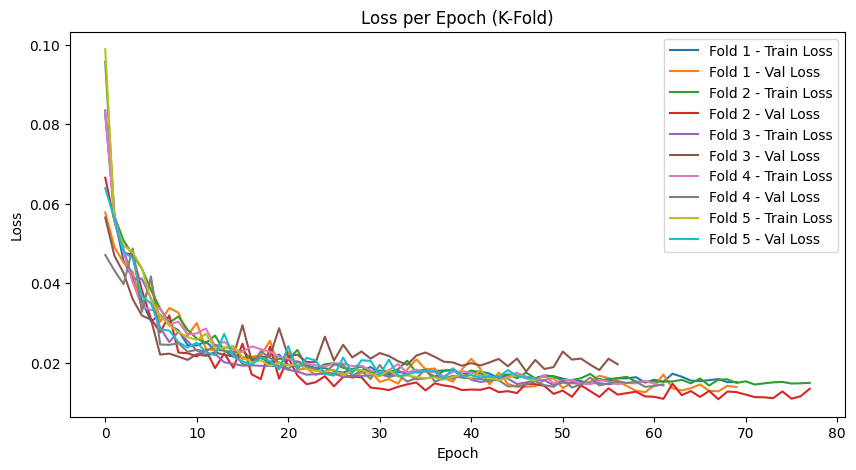

In [29]:
# 4. Loss 그래프
plt.figure(figsize=(10, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history['loss'], label=f'Fold {fold + 1} - Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {fold + 1} - Val Loss')

plt.title('Loss per Epoch (K-Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

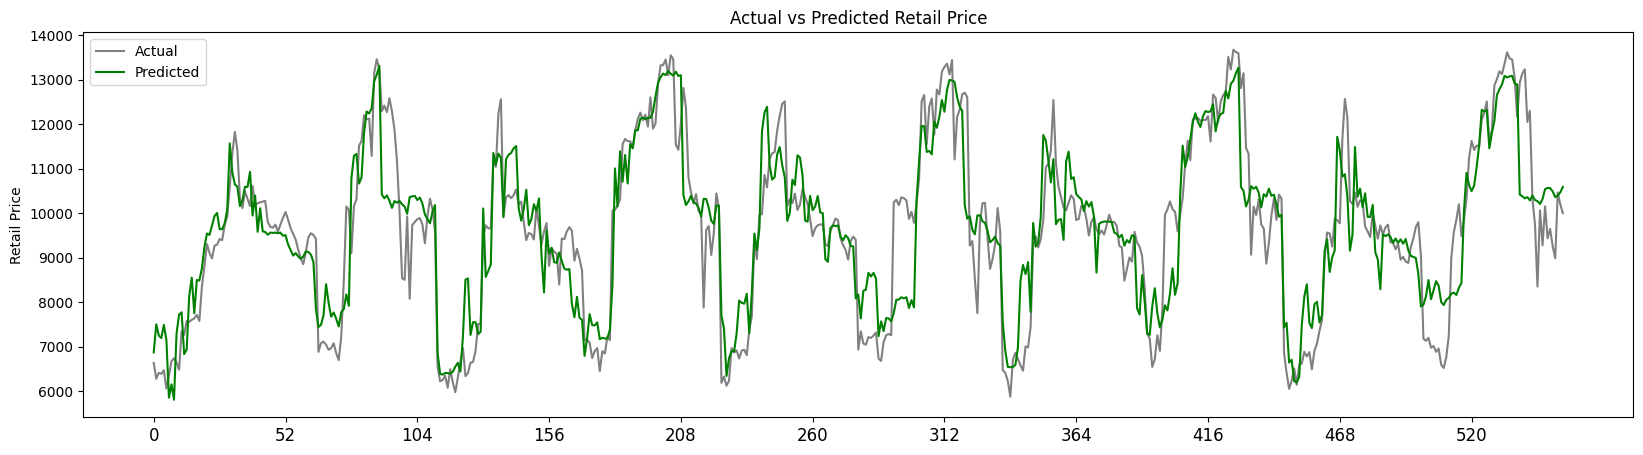

In [30]:
# 5. Actual vs Predicted 그래프
num_weeks = np.concatenate(y_test_inverse_all).shape[0]  # y_test_inverse_all의 길이로 num_weeks 정의

plt.figure(figsize=(20, 5))
plt.plot(np.concatenate(y_test_inverse_all), label='Actual', color='gray')
plt.plot(np.concatenate(y_pred_inverse_all), label='Predicted', color='green')
plt.title('Actual vs Predicted Retail Price')
plt.ylabel('Retail Price')

# X축 눈금 52주 간격으로 표시
plt.xticks(np.arange(0, num_weeks, step=52), fontsize=12)

plt.legend()
plt.show()

### GRU

In [12]:
from keras.layers import LSTM, Dense, Dropout, GRU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# 데이터 준비
X = garlic[['exchange rate', 'production', 'cultivation area']].values
y = garlic[['retail price']].values

# 데이터 정규화
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y)

# KFold 설정 (5개의 폴드 사용)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 1. 각 폴드별 MAE, MAPE, RMSE 저장 리스트
fold_mae_scores = []
fold_mape_scores = []
fold_rmse_scores = []
fold_histories = []  # 폴드별 학습 기록 저장 리스트
y_test_inverse_all = []  # 실제값 저장 리스트
y_pred_inverse_all = []  # 예측값 저장 리스트

# 2. K-fold 검증 루프
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # 모델 구성 및 학습
    gru_model = Sequential()
    gru_model.add(GRU(32, activation='tanh', input_shape=(X_train.shape[1], 1)))
    gru_model.add(Dropout(0.1))
    gru_model.add(Dense(1))

    optimizer = Adam(learning_rate=0.01)
    gru_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = gru_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=120, batch_size=10, verbose=2,
                        callbacks=[early_stopping])

    # 학습 기록 저장
    fold_histories.append(history.history)

    # 예측 및 역정규화
    y_val_pred = gru_model.predict(X_val).flatten()
    y_val_pred_inverse = scalerY.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_val_inverse = scalerY.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # 성능 지표 계산 및 저장
    mae = mean_absolute_error(y_val_inverse, y_val_pred_inverse)
    mape = mean_absolute_percentage_error(y_val_inverse, y_val_pred_inverse)
    rmse = np.sqrt(mean_squared_error(y_val_inverse, y_val_pred_inverse))

    print(f'Fold {fold + 1} - MAE: {mae:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}')

    fold_mae_scores.append(mae)
    fold_mape_scores.append(mape)
    fold_rmse_scores.append(rmse)

    # 예측 및 실제값 저장
    y_test_inverse_all.append(y_val_inverse)
    y_pred_inverse_all.append(y_val_pred_inverse)

# 3. 평균 성능 출력
print(f'\nAverage MAE across all folds: {np.mean(fold_mae_scores):.4f}')
print(f'Average MAPE across all folds: {np.mean(fold_mape_scores):.4f}')
print(f'Average RMSE across all folds: {np.mean(fold_rmse_scores):.4f}')


Fold 1
Epoch 1/120


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 63ms/step - loss: 0.0984 - mae: 0.2440 - val_loss: 0.0507 - val_mae: 0.1837
Epoch 2/120
45/45 - 0s - 4ms/step - loss: 0.0537 - mae: 0.1857 - val_loss: 0.0569 - val_mae: 0.2078
Epoch 3/120
45/45 - 0s - 10ms/step - loss: 0.0505 - mae: 0.1822 - val_loss: 0.0537 - val_mae: 0.2027
Epoch 4/120
45/45 - 0s - 5ms/step - loss: 0.0429 - mae: 0.1776 - val_loss: 0.0469 - val_mae: 0.1914
Epoch 5/120
45/45 - 0s - 4ms/step - loss: 0.0364 - mae: 0.1651 - val_loss: 0.0374 - val_mae: 0.1699
Epoch 6/120
45/45 - 0s - 4ms/step - loss: 0.0338 - mae: 0.1534 - val_loss: 0.0326 - val_mae: 0.1539
Epoch 7/120
45/45 - 0s - 4ms/step - loss: 0.0323 - mae: 0.1482 - val_loss: 0.0377 - val_mae: 0.1571
Epoch 8/120
45/45 - 0s - 4ms/step - loss: 0.0290 - mae: 0.1425 - val_loss: 0.0283 - val_mae: 0.1450
Epoch 9/120
45/45 - 0s - 4ms/step - loss: 0.0279 - mae: 0.1378 - val_loss: 0.0290 - val_mae: 0.1426
Epoch 10/120
45/45 - 0s - 4ms/step - loss: 0.0264 - mae: 0.1332 - val_loss: 0.0252 - val_mae: 0.1351
Epoch 11/

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 63ms/step - loss: 0.0711 - mae: 0.2185 - val_loss: 0.0640 - val_mae: 0.2203
Epoch 2/120
45/45 - 0s - 4ms/step - loss: 0.0570 - mae: 0.1945 - val_loss: 0.0594 - val_mae: 0.2092
Epoch 3/120
45/45 - 0s - 6ms/step - loss: 0.0536 - mae: 0.1940 - val_loss: 0.0438 - val_mae: 0.1704
Epoch 4/120
45/45 - 0s - 4ms/step - loss: 0.0423 - mae: 0.1764 - val_loss: 0.0353 - val_mae: 0.1572
Epoch 5/120
45/45 - 0s - 4ms/step - loss: 0.0338 - mae: 0.1548 - val_loss: 0.0273 - val_mae: 0.1413
Epoch 6/120
45/45 - 0s - 4ms/step - loss: 0.0294 - mae: 0.1426 - val_loss: 0.0238 - val_mae: 0.1271
Epoch 7/120
45/45 - 0s - 4ms/step - loss: 0.0329 - mae: 0.1500 - val_loss: 0.0385 - val_mae: 0.1632
Epoch 8/120
45/45 - 0s - 5ms/step - loss: 0.0350 - mae: 0.1529 - val_loss: 0.0249 - val_mae: 0.1330
Epoch 9/120
45/45 - 0s - 6ms/step - loss: 0.0310 - mae: 0.1452 - val_loss: 0.0206 - val_mae: 0.1171
Epoch 10/120
45/45 - 0s - 4ms/step - loss: 0.0280 - mae: 0.1360 - val_loss: 0.0194 - val_mae: 0.1143
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 67ms/step - loss: 0.0802 - mae: 0.2243 - val_loss: 0.0487 - val_mae: 0.1768
Epoch 2/120
45/45 - 0s - 5ms/step - loss: 0.0532 - mae: 0.1879 - val_loss: 0.0454 - val_mae: 0.1789
Epoch 3/120
45/45 - 0s - 4ms/step - loss: 0.0471 - mae: 0.1869 - val_loss: 0.0386 - val_mae: 0.1785
Epoch 4/120
45/45 - 0s - 4ms/step - loss: 0.0377 - mae: 0.1659 - val_loss: 0.0364 - val_mae: 0.1607
Epoch 5/120
45/45 - 0s - 4ms/step - loss: 0.0304 - mae: 0.1460 - val_loss: 0.0235 - val_mae: 0.1304
Epoch 6/120
45/45 - 0s - 4ms/step - loss: 0.0309 - mae: 0.1446 - val_loss: 0.0229 - val_mae: 0.1282
Epoch 7/120
45/45 - 0s - 4ms/step - loss: 0.0284 - mae: 0.1369 - val_loss: 0.0257 - val_mae: 0.1369
Epoch 8/120
45/45 - 0s - 4ms/step - loss: 0.0300 - mae: 0.1422 - val_loss: 0.0280 - val_mae: 0.1380
Epoch 9/120
45/45 - 0s - 4ms/step - loss: 0.0273 - mae: 0.1311 - val_loss: 0.0276 - val_mae: 0.1427
Epoch 10/120
45/45 - 0s - 4ms/step - loss: 0.0247 - mae: 0.1267 - val_loss: 0.0256 - val_mae: 0.1386
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 65ms/step - loss: 0.0729 - mae: 0.2149 - val_loss: 0.0473 - val_mae: 0.1844
Epoch 2/120
45/45 - 0s - 5ms/step - loss: 0.0587 - mae: 0.2008 - val_loss: 0.0414 - val_mae: 0.1576
Epoch 3/120
45/45 - 0s - 4ms/step - loss: 0.0531 - mae: 0.1939 - val_loss: 0.0346 - val_mae: 0.1653
Epoch 4/120
45/45 - 0s - 4ms/step - loss: 0.0434 - mae: 0.1773 - val_loss: 0.0336 - val_mae: 0.1657
Epoch 5/120
45/45 - 0s - 4ms/step - loss: 0.0364 - mae: 0.1625 - val_loss: 0.0352 - val_mae: 0.1620
Epoch 6/120
45/45 - 0s - 4ms/step - loss: 0.0415 - mae: 0.1677 - val_loss: 0.0465 - val_mae: 0.1815
Epoch 7/120
45/45 - 0s - 5ms/step - loss: 0.0329 - mae: 0.1544 - val_loss: 0.0270 - val_mae: 0.1371
Epoch 8/120
45/45 - 0s - 4ms/step - loss: 0.0292 - mae: 0.1401 - val_loss: 0.0250 - val_mae: 0.1295
Epoch 9/120
45/45 - 0s - 4ms/step - loss: 0.0311 - mae: 0.1444 - val_loss: 0.0242 - val_mae: 0.1264
Epoch 10/120
45/45 - 0s - 4ms/step - loss: 0.0271 - mae: 0.1373 - val_loss: 0.0230 - val_mae: 0.1217
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 64ms/step - loss: 0.0694 - mae: 0.2163 - val_loss: 0.0624 - val_mae: 0.1927
Epoch 2/120
45/45 - 0s - 4ms/step - loss: 0.0514 - mae: 0.1905 - val_loss: 0.0435 - val_mae: 0.1754
Epoch 3/120
45/45 - 0s - 4ms/step - loss: 0.0431 - mae: 0.1738 - val_loss: 0.0438 - val_mae: 0.1699
Epoch 4/120
45/45 - 0s - 4ms/step - loss: 0.0414 - mae: 0.1694 - val_loss: 0.0375 - val_mae: 0.1641
Epoch 5/120
45/45 - 0s - 4ms/step - loss: 0.0389 - mae: 0.1668 - val_loss: 0.0378 - val_mae: 0.1657
Epoch 6/120
45/45 - 0s - 4ms/step - loss: 0.0378 - mae: 0.1652 - val_loss: 0.0357 - val_mae: 0.1611
Epoch 7/120
45/45 - 0s - 4ms/step - loss: 0.0364 - mae: 0.1629 - val_loss: 0.0323 - val_mae: 0.1556
Epoch 8/120
45/45 - 0s - 4ms/step - loss: 0.0322 - mae: 0.1506 - val_loss: 0.0271 - val_mae: 0.1391
Epoch 9/120
45/45 - 0s - 4ms/step - loss: 0.0280 - mae: 0.1394 - val_loss: 0.0276 - val_mae: 0.1352
Epoch 10/120
45/45 - 0s - 4ms/step - loss: 0.0236 - mae: 0.1269 - val_loss: 0.0202 - val_mae: 0.1179
Epoch 11/1

In [ ]:
def predict_future_weeks_extended(model, initial_data, scalerX, scalerY, weeks=13):
    predictions = []
    
    # 데이터를 모델 입력 형식으로 정규화하고 3D로 변형
    current_data = scalerX.transform(initial_data).reshape((1, initial_data.shape[1], 1))
    
    for week in range(weeks):
        # 모델을 사용해 예측
        predicted_scaled = model.predict(current_data)
        predicted_price = scalerY.inverse_transform(predicted_scaled).flatten()[0]
        
        # 예측 결과 저장
        predictions.append(predicted_price)
        
        # 다음 주차 예측을 위한 입력 데이터 갱신
        current_data = np.append(current_data[:, 1:], predicted_scaled.reshape(1, 1, 1), axis=1)
    
    return predictions

# 예측을 100번 수행하고 평균값 계산
num_predictions = 100
all_predictions = []

# 초기 데이터 설정 (마늘 관련 데이터)
initial_data = garlic[['exchange rate', 'production', 'cultivation area']].values[-1].reshape(1, -1)

for _ in range(num_predictions):
    predicted_prices = predict_future_weeks_extended(gru_model, initial_data, scalerX, scalerY, weeks=13)
    all_predictions.append(predicted_prices)

# numpy 배열로 변환하여 평균값 계산
all_predictions = np.array(all_predictions)
average_predictions = np.mean(all_predictions, axis=0)

# 평균 예측 결과 출력
average_predictions_df = pd.DataFrame(average_predictions, columns=['Average Predicted Retail Price'])
average_predictions_df.index = pd.date_range(start='2024-09-01', periods=13, freq='W-SUN')
print(average_predictions_df)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

In [ ]:
# 4. Loss 그래프
plt.figure(figsize=(10, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history['loss'], label=f'Fold {fold + 1} - Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {fold + 1} - Val Loss')

plt.title('Loss per Epoch (K-Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# 5. Actual vs Predicted 그래프
num_weeks = np.concatenate(y_test_inverse_all).shape[0]  # y_test_inverse_all의 길이로 num_weeks 정의

plt.figure(figsize=(20, 5))
plt.plot(np.concatenate(y_test_inverse_all), label='Actual', color='gray')
plt.plot(np.concatenate(y_pred_inverse_all), label='Predicted', color='green')
plt.title('Actual vs Predicted Retail Price')
plt.ylabel('Retail Price')

# X축 눈금 52주 간격으로 표시
plt.xticks(np.arange(0, num_weeks, step=52), fontsize=12)

plt.legend()
plt.show()

### RNN

In [17]:
from keras.layers import LSTM, Dense, Dropout, SimpleRNN
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# 데이터 준비
X = garlic[['exchange rate', 'production', 'cultivation area']].values
y = garlic[['retail price']].values

# 데이터 정규화
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y)

# KFold 설정 (5개의 폴드 사용)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 1. 각 폴드별 MAE, MAPE, RMSE 저장 리스트
fold_mae_scores = []
fold_mape_scores = []
fold_rmse_scores = []
fold_histories = []  # 폴드별 학습 기록 저장 리스트
y_test_inverse_all = []  # 실제값 저장 리스트
y_pred_inverse_all = []  # 예측값 저장 리스트

# 2. K-fold 검증 루프
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # 모델 구성 및 학습
    rnn_model = Sequential()
    rnn_model.add(SimpleRNN(32, activation='tanh', input_shape=(X_train.shape[1], 1)))
    rnn_model.add(Dropout(0.1))
    rnn_model.add(Dense(1))

    optimizer = Adam(learning_rate=0.01)
    rnn_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=120, batch_size=10, verbose=2,
                        callbacks=[early_stopping])

    # 학습 기록 저장
    fold_histories.append(history.history)

    # 예측 및 역정규화
    y_val_pred = rnn_model.predict(X_val).flatten()
    y_val_pred_inverse = scalerY.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_val_inverse = scalerY.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # 성능 지표 계산 및 저장
    mae = mean_absolute_error(y_val_inverse, y_val_pred_inverse)
    mape = mean_absolute_percentage_error(y_val_inverse, y_val_pred_inverse)
    rmse = np.sqrt(mean_squared_error(y_val_inverse, y_val_pred_inverse))

    print(f'Fold {fold + 1} - MAE: {mae:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}')

    fold_mae_scores.append(mae)
    fold_mape_scores.append(mape)
    fold_rmse_scores.append(rmse)

    # 예측 및 실제값 저장
    y_test_inverse_all.append(y_val_inverse)
    y_pred_inverse_all.append(y_val_pred_inverse)

# 3. 평균 성능 출력
print(f'\nAverage MAE across all folds: {np.mean(fold_mae_scores):.4f}')
print(f'Average MAPE across all folds: {np.mean(fold_mape_scores):.4f}')
print(f'Average RMSE across all folds: {np.mean(fold_rmse_scores):.4f}')



Fold 1
Epoch 1/120


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 46ms/step - loss: 0.0772 - mae: 0.2081 - val_loss: 0.0588 - val_mae: 0.2008
Epoch 2/120
45/45 - 0s - 3ms/step - loss: 0.0462 - mae: 0.1766 - val_loss: 0.0428 - val_mae: 0.1780
Epoch 3/120
45/45 - 0s - 3ms/step - loss: 0.0449 - mae: 0.1734 - val_loss: 0.0366 - val_mae: 0.1689
Epoch 4/120
45/45 - 0s - 3ms/step - loss: 0.0404 - mae: 0.1671 - val_loss: 0.0402 - val_mae: 0.1699
Epoch 5/120
45/45 - 0s - 3ms/step - loss: 0.0422 - mae: 0.1691 - val_loss: 0.0473 - val_mae: 0.1828
Epoch 6/120
45/45 - 0s - 3ms/step - loss: 0.0421 - mae: 0.1700 - val_loss: 0.0484 - val_mae: 0.1836
Epoch 7/120
45/45 - 0s - 3ms/step - loss: 0.0403 - mae: 0.1662 - val_loss: 0.0406 - val_mae: 0.1739
Epoch 8/120
45/45 - 0s - 3ms/step - loss: 0.0388 - mae: 0.1634 - val_loss: 0.0374 - val_mae: 0.1707
Epoch 9/120
45/45 - 0s - 2ms/step - loss: 0.0392 - mae: 0.1657 - val_loss: 0.0443 - val_mae: 0.1797
Epoch 10/120
45/45 - 0s - 3ms/step - loss: 0.0407 - mae: 0.1694 - val_loss: 0.0381 - val_mae: 0.1721
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 1s - 33ms/step - loss: 0.0819 - mae: 0.2354 - val_loss: 0.0502 - val_mae: 0.1871
Epoch 2/120
45/45 - 0s - 2ms/step - loss: 0.0443 - mae: 0.1716 - val_loss: 0.0414 - val_mae: 0.1686
Epoch 3/120
45/45 - 0s - 2ms/step - loss: 0.0411 - mae: 0.1721 - val_loss: 0.0390 - val_mae: 0.1609
Epoch 4/120
45/45 - 0s - 2ms/step - loss: 0.0418 - mae: 0.1725 - val_loss: 0.0397 - val_mae: 0.1673
Epoch 5/120
45/45 - 0s - 2ms/step - loss: 0.0405 - mae: 0.1685 - val_loss: 0.0398 - val_mae: 0.1586
Epoch 6/120
45/45 - 0s - 3ms/step - loss: 0.0391 - mae: 0.1650 - val_loss: 0.0386 - val_mae: 0.1665
Epoch 7/120
45/45 - 0s - 2ms/step - loss: 0.0411 - mae: 0.1684 - val_loss: 0.0462 - val_mae: 0.1784
Epoch 8/120
45/45 - 0s - 3ms/step - loss: 0.0411 - mae: 0.1693 - val_loss: 0.0391 - val_mae: 0.1651
Epoch 9/120
45/45 - 0s - 2ms/step - loss: 0.0386 - mae: 0.1648 - val_loss: 0.0385 - val_mae: 0.1649
Epoch 10/120
45/45 - 0s - 2ms/step - loss: 0.0389 - mae: 0.1681 - val_loss: 0.0389 - val_mae: 0.1671
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 50ms/step - loss: 0.0691 - mae: 0.2142 - val_loss: 0.0382 - val_mae: 0.1664
Epoch 2/120
45/45 - 0s - 3ms/step - loss: 0.0445 - mae: 0.1744 - val_loss: 0.0378 - val_mae: 0.1668
Epoch 3/120
45/45 - 0s - 3ms/step - loss: 0.0447 - mae: 0.1746 - val_loss: 0.0373 - val_mae: 0.1585
Epoch 4/120
45/45 - 0s - 3ms/step - loss: 0.0428 - mae: 0.1705 - val_loss: 0.0387 - val_mae: 0.1627
Epoch 5/120
45/45 - 0s - 3ms/step - loss: 0.0415 - mae: 0.1701 - val_loss: 0.0403 - val_mae: 0.1701
Epoch 6/120
45/45 - 0s - 4ms/step - loss: 0.0410 - mae: 0.1729 - val_loss: 0.0380 - val_mae: 0.1590
Epoch 7/120
45/45 - 0s - 3ms/step - loss: 0.0404 - mae: 0.1664 - val_loss: 0.0412 - val_mae: 0.1755
Epoch 8/120
45/45 - 0s - 3ms/step - loss: 0.0416 - mae: 0.1719 - val_loss: 0.0385 - val_mae: 0.1628
Epoch 9/120
45/45 - 0s - 3ms/step - loss: 0.0385 - mae: 0.1660 - val_loss: 0.0378 - val_mae: 0.1631
Epoch 10/120
45/45 - 0s - 3ms/step - loss: 0.0389 - mae: 0.1665 - val_loss: 0.0368 - val_mae: 0.1612
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 41ms/step - loss: 0.0787 - mae: 0.2228 - val_loss: 0.0516 - val_mae: 0.1892
Epoch 2/120
45/45 - 0s - 2ms/step - loss: 0.0445 - mae: 0.1780 - val_loss: 0.0549 - val_mae: 0.1931
Epoch 3/120
45/45 - 0s - 2ms/step - loss: 0.0459 - mae: 0.1785 - val_loss: 0.0370 - val_mae: 0.1600
Epoch 4/120
45/45 - 0s - 3ms/step - loss: 0.0450 - mae: 0.1742 - val_loss: 0.0365 - val_mae: 0.1553
Epoch 5/120
45/45 - 0s - 3ms/step - loss: 0.0434 - mae: 0.1742 - val_loss: 0.0395 - val_mae: 0.1648
Epoch 6/120
45/45 - 0s - 2ms/step - loss: 0.0406 - mae: 0.1675 - val_loss: 0.0372 - val_mae: 0.1611
Epoch 7/120
45/45 - 0s - 2ms/step - loss: 0.0418 - mae: 0.1720 - val_loss: 0.0429 - val_mae: 0.1682
Epoch 8/120
45/45 - 0s - 2ms/step - loss: 0.0433 - mae: 0.1738 - val_loss: 0.0456 - val_mae: 0.1736
Epoch 9/120
45/45 - 0s - 2ms/step - loss: 0.0426 - mae: 0.1728 - val_loss: 0.0398 - val_mae: 0.1629
Epoch 10/120
45/45 - 0s - 2ms/step - loss: 0.0401 - mae: 0.1659 - val_loss: 0.0328 - val_mae: 0.1527
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 38ms/step - loss: 0.0867 - mae: 0.2322 - val_loss: 0.0367 - val_mae: 0.1626
Epoch 2/120
45/45 - 0s - 3ms/step - loss: 0.0443 - mae: 0.1735 - val_loss: 0.0404 - val_mae: 0.1655
Epoch 3/120
45/45 - 0s - 2ms/step - loss: 0.0427 - mae: 0.1716 - val_loss: 0.0368 - val_mae: 0.1589
Epoch 4/120
45/45 - 0s - 2ms/step - loss: 0.0430 - mae: 0.1725 - val_loss: 0.0402 - val_mae: 0.1625
Epoch 5/120
45/45 - 0s - 2ms/step - loss: 0.0397 - mae: 0.1657 - val_loss: 0.0362 - val_mae: 0.1612
Epoch 6/120
45/45 - 0s - 2ms/step - loss: 0.0405 - mae: 0.1680 - val_loss: 0.0357 - val_mae: 0.1590
Epoch 7/120
45/45 - 0s - 3ms/step - loss: 0.0399 - mae: 0.1673 - val_loss: 0.0404 - val_mae: 0.1640
Epoch 8/120
45/45 - 0s - 3ms/step - loss: 0.0424 - mae: 0.1708 - val_loss: 0.0448 - val_mae: 0.1787
Epoch 9/120
45/45 - 0s - 3ms/step - loss: 0.0368 - mae: 0.1604 - val_loss: 0.0334 - val_mae: 0.1577
Epoch 10/120
45/45 - 0s - 3ms/step - loss: 0.0363 - mae: 0.1591 - val_loss: 0.0332 - val_mae: 0.1564
Epoch 11/1

In [18]:
# 9월 1주차부터 4주차 가격 예측
# 마지막 학습 데이터의 마지막 주차 가져오기
last_data = garlic.iloc[-1][['exchange rate', 'production', 'cultivation area']].values.reshape(1, -1)

predicted_prices = []

# 4주 예측
for week in range(4):
    # 현재 데이터를 LSTM 입력 형식으로 변형
    last_data_scaled = scalerX.transform(last_data)  # 2D 배열로 변환됨
    last_data_scaled = last_data_scaled.reshape((1, last_data_scaled.shape[1], 1))

    # 가격 예측
    predicted_price_scaled = rnn_model.predict(last_data_scaled)
    predicted_price = scalerY.inverse_transform(predicted_price_scaled.reshape(-1, 1)).flatten()

    # 예측값 저장
    predicted_prices.append(predicted_price[0])

    # 다음 주차 입력 데이터 갱신 (예측한 값을 포함하여 새로운 입력 데이터 생성)
    last_data = np.array([last_data[0][0], last_data[0][1], last_data[0][2]])  # 기존 데이터 유지
    last_data = np.append(last_data, predicted_price)  # 예측한 가격을 추가
    last_data = last_data[-3:].reshape(1, -1)  # 최근 3개의 특징만 유지하고 2D 배열로 변환

# 결과 출력
predicted_prices_df = pd.DataFrame(predicted_prices, columns=['Predicted Retail Price'])
predicted_prices_df.index = pd.date_range(start='2024-09-01', periods=4, freq='W-SUN')  # 주간 데이터 인덱스

print(predicted_prices_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
            Predicted Retail Price
2024-09-01            10781.515625
2024-09-08            13524.966797
2024-09-15            13556.333984
2024-09-22            13475.037109


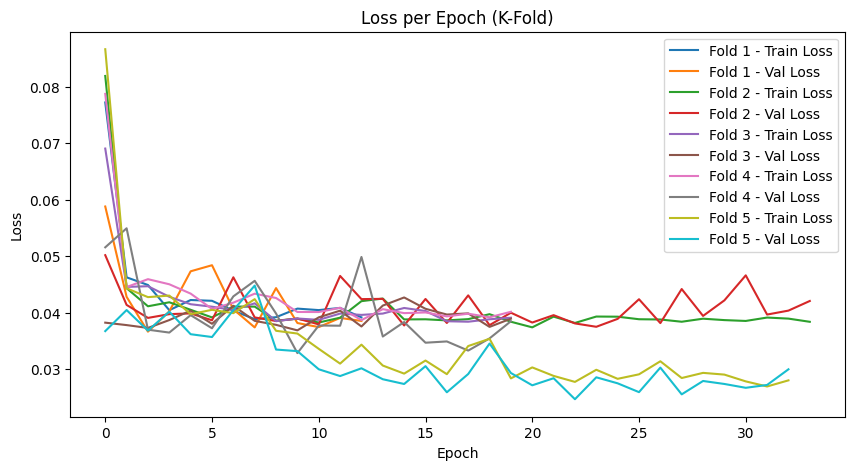

In [19]:
# 4. Loss 그래프
plt.figure(figsize=(10, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history['loss'], label=f'Fold {fold + 1} - Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {fold + 1} - Val Loss')

plt.title('Loss per Epoch (K-Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

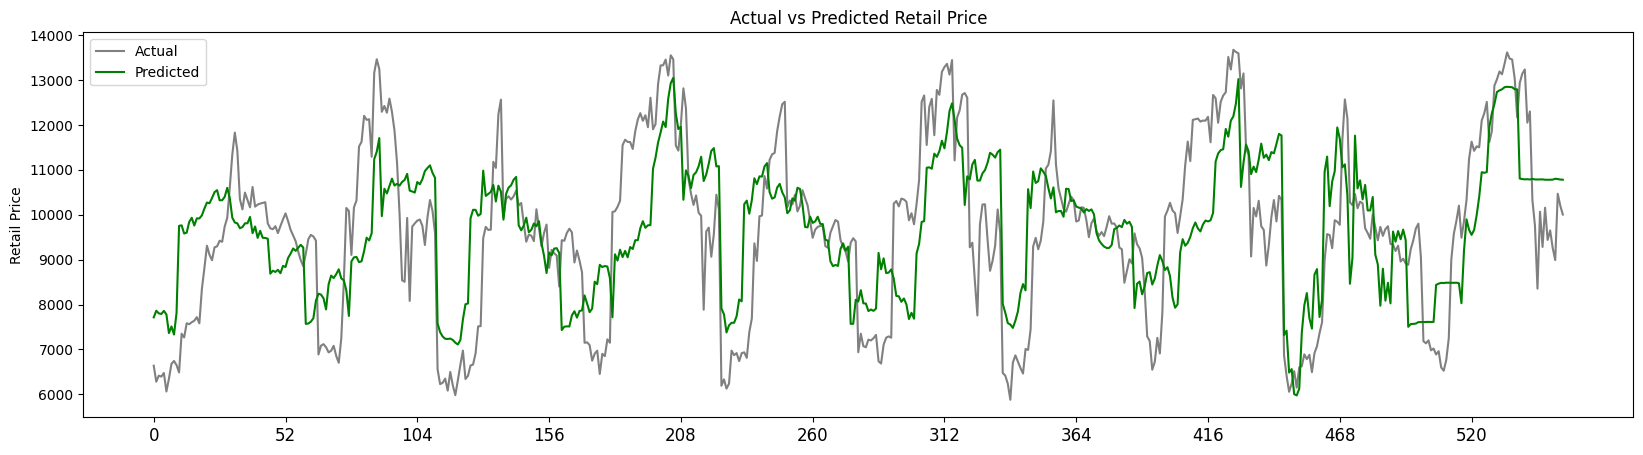

In [20]:
# 5. Actual vs Predicted 그래프
num_weeks = np.concatenate(y_test_inverse_all).shape[0]  # y_test_inverse_all의 길이로 num_weeks 정의

plt.figure(figsize=(20, 5))
plt.plot(np.concatenate(y_test_inverse_all), label='Actual', color='gray')
plt.plot(np.concatenate(y_pred_inverse_all), label='Predicted', color='green')
plt.title('Actual vs Predicted Retail Price')
plt.ylabel('Retail Price')

# X축 눈금 52주 간격으로 표시
plt.xticks(np.arange(0, num_weeks, step=52), fontsize=12)

plt.legend()
plt.show()

### shap value

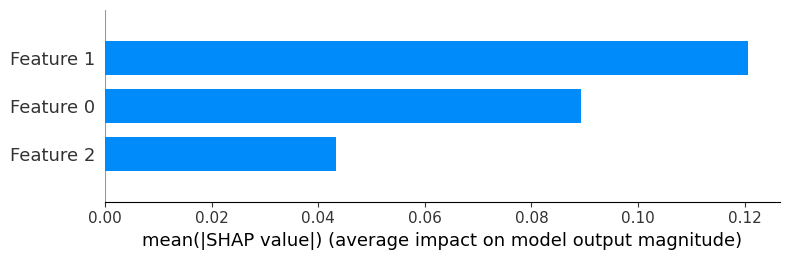

In [21]:
import shap

# 1. 해석하고자 하는 모델을 정규화된 데이터를 기반으로 SHAP 계산
explainer = shap.Explainer(gru_model, X_scaled)  # rnn_model 사용
# SHAP 계산 (검증 데이터로 해석)
shap_values = explainer(X_val.reshape(X_val.shape[0], X_val.shape[1]))  # 2D 형태로 변환

# 2. SHAP 시각화
shap.summary_plot(shap_values, X_val.reshape(X_val.shape[0], X_val.shape[1]), plot_type='bar')

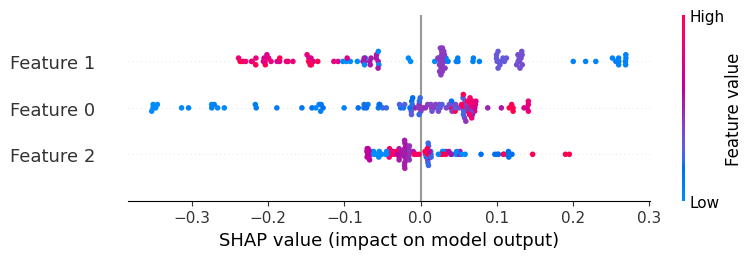

In [22]:
shap.summary_plot(shap_values, X_val.reshape(X_val.shape[0], X_val.shape[1]))

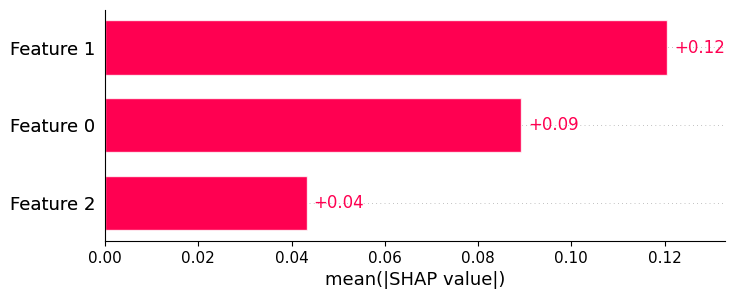

In [23]:
shap.plots.bar(shap_values)

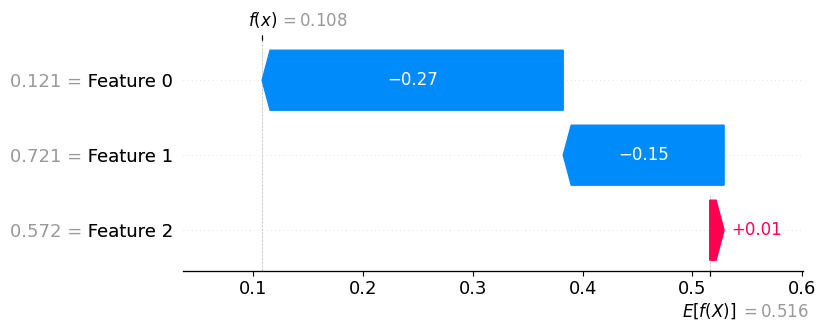

In [24]:
shap.plots.waterfall(shap_values[0])